In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import seaborn as sns

## DATA COLLECTION:

In [2]:
df=pd.read_csv('train.csv')
df.head()

C:\Users\rajna\AppData\Local\Temp\ipykernel_2004\616239795.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
print('The data-frame has {} rows and {} columns before cleaning .'.format(df.shape[0],df.shape[1]))

The data-frame has 100000 rows and 28 columns before cleaning .


## DATA CLEANING:

In [4]:
df=df.drop(['ID','Customer_ID','Name','SSN'],axis=1)

Dropping these columns because there is no meaning of having these output doesnt have any correlation with these.

In [5]:
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [6]:
df.duplicated().sum()

0

We can see that there is no duplicated rows.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

Checking the data type of the columns present in the data.

In [8]:
cols=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit', 'Num_Credit_Inquiries','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

In [9]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

These are columns present in the dataframe.

In [10]:
df.isnull().sum().sort_values(ascending=False)

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
Month                           0
Credit_Mix                      0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Changed_Credit_Limit            0
Age                             0
Delay_from_due_date             0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
Credit_Score                    0
dtype: int64

There are few null values which needs to imputed.

In [11]:
def age_conv(x):
    x=str(x)
    if '_' in x:
        x=x.replace('_','0')
        x=np.round(np.abs(int(x)/10))
        return x
    else:
        return np.round(np.abs(int(x)))


    
df.Age=df.Age.apply(age_conv)        

In [12]:
def ai_conv(x):
    x=str(x)
    y=float(x.replace('_',"0"))
    y=np.round(np.abs(float(y)))
    return y
df.Annual_Income=df.Annual_Income.apply(ai_conv)

In [13]:
def nb_conv(x):
    x=str(x)
    return np.round(np.abs(int(x)),2)
df.Num_Bank_Accounts=df.Num_Bank_Accounts.apply(nb_conv)        

In [14]:
df.Num_Credit_Card=df.Num_Credit_Card.apply(nb_conv)

In [15]:
def interest_conv(x):
    x=str(x)
    return np.round(np.abs(int(x)),2)
        
        
df.Interest_Rate=df.Interest_Rate.apply(interest_conv)          

In [16]:
def loan_conv(x):
    x=str(x)
    if '_' in x:
        x=x.replace('_','0')
        x=np.round(np.abs(int(x)/10))
        return x
    else:
        return np.round(np.abs(int(x)),2)
df.Num_of_Loan=df.Num_of_Loan.apply(loan_conv)

In [17]:
df=df.drop('Type_of_Loan',axis=1)

In [18]:
def due_date(x):
    x=np.round(np.abs(x))
    return x
df.Delay_from_due_date=df.Delay_from_due_date.apply(due_date)

In [19]:
def delay_pay(x):
    x=str(x)
    if x == 'nan':
        return np.NaN
    else:
        if '_' in x:
            x=x.replace('_','0')
            x=np.abs(int(x)/10)
            return x
        else:
            return np.round(np.abs(int(x)),2)
df.Num_of_Delayed_Payment=df.Num_of_Delayed_Payment.apply(delay_pay)

In [20]:
def changed_credit(x):
    x=str(x)
    if len(x)==1:
        if x=='_':
            return np.NaN
        else:
            return np.round(float(x),2)
    else:
        return np.round(float(x),2)
df.Changed_Credit_Limit=df.Changed_Credit_Limit.apply(changed_credit)

In [21]:
def credit_mix(x):
    if x=='_':
        return np.NaN
    else:
        return x 
df.Credit_Mix=df.Credit_Mix.apply(credit_mix)

In [22]:
def outstanding_conv(x):
    x=str(x)
    if '_' in x:
        x=x.replace('_','0')
        x=np.abs(float(x)/10)
        return np.round(float(x),2)
    else:
        return np.round(float(x),2)

df.Outstanding_Debt=df.Outstanding_Debt.apply(outstanding_conv)

In [23]:
df.Credit_Utilization_Ratio=df.Credit_Utilization_Ratio.map(lambda x : np.round(x))

In [24]:
def history_conv(x):
    if x == 'nan':
        return np.nan 
    else:
        x=str(x)
        x=x.replace('Years and','')
        x=x.replace('Months','')
        x=x.split(' ')
        y=[]
        for i in x:
            if i== '':
                continue
            else:
                y.append(i)
        x='.'.join(y)
     
    return np.round(float(x),2)
        
       
df.Credit_History_Age=df.Credit_History_Age.apply(history_conv)       

In [25]:
def total_emi(x):
    if x == 0:
        return 0
    else:
        return np.round(int(x),2)
df.Total_EMI_per_month=df.Total_EMI_per_month.apply(total_emi)

In [26]:
def invested(x):
    z=[]
    x=str(x)
    if '_' in x:
        y=x.split('_')
        for i in y:
            if i == '_':
                continue
            else:
                z.append(i)
        a=int(''.join(z))
        return np.round(float(a),2) 
    else:
        return np.round(float(x),2)

        
df.Amount_invested_monthly=df.Amount_invested_monthly.apply(invested)

In [27]:
def behaviour(x):
    if x in ['High_spent_Small_value_payments','Low_spent_Large_value_payments','Low_spent_Medium_value_payments','Low_spent_Small_value_payments','High_spent_Medium_value_payments', 'High_spent_Large_value_payments']:
        return x 
    else:
        return np.NaN
df.Payment_Behaviour=df.Payment_Behaviour.apply(behaviour)

In [28]:
def balance(x):    
    z=[]
    x=str(x)
    if '_' in x:
        y=x.split('_')
        for i in y:
            if i == ' ':
                continue
            else:
                z.append(i)
        a=float((''.join(z)))
        b = np.round(np.abs(float(a)),2)
        return b
    else:
        b = np.round(np.abs(float(x)),2)
        return b

df.Monthly_Balance=df.Monthly_Balance.apply(balance)    

In [29]:
def occupation(x):
    if x in['Scientist', 'Teacher', 'Engineer', 'Entrepreneur','Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist','Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer','Architect']:
        return x 
    else:
        return np.NaN
df['Occupation']=df.Occupation.apply(occupation)

In [30]:
def m_salary(x):
    if x==np.nan:
        return x
    else:
        return np.round(float(x),2)
df['Monthly_Inhand_Salary']=df['Monthly_Inhand_Salary'].apply(m_salary)

The data needed some cleaning so it has been done the requirement.

In [31]:
print('The data-frame has {} rows and {} columns after cleaning .'.format(df.shape[0],df.shape[1]))

The data-frame has 100000 rows and 23 columns after cleaning .


In [32]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,90970.000000,100000.000000,95521.000000,9.880000e+04
mean,119.509700,1.764157e+05,4194.170823,17.091700,22.47443,72.466040,10.761960,21.095040,30.946268,10.389025,27.754251,1413.521289,32.284570,18.359271,1402.687080,637.413012,3.036437e+22
std,684.757313,1.429618e+06,3183.686134,117.404773,129.05741,466.422621,61.789933,14.822802,226.028754,6.789496,193.177339,1156.434704,5.123916,8.315917,8306.107873,2043.319326,3.181295e+24
min,14.000000,7.006000e+03,303.650000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,0.100000,0.000000,0.000000,1.000000e-02
25%,25.000000,1.945800e+04,1625.570000,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,551.800000,28.000000,12.000000,30.000000,74.530000,2.701100e+02
50%,34.000000,3.757900e+04,3093.750000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1154.390000,32.000000,18.200000,69.000000,135.930000,3.367400e+02
75%,42.000000,7.279100e+04,5957.450000,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,1933.430000,36.000000,25.100000,161.000000,265.730000,4.703325e+02
max,8698.000000,2.419806e+07,15204.630000,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,33.800000,82331.000000,10000.000000,3.333333e+26


## DATA PREPROCESSING:

In [33]:
categorical_data=[]
numerical_data=[]
for i in df.columns:
    if i == 'Credit_Score':
        continue
    else:
        if df[i].dtype=='O':
            categorical_data.append(i)
        else:
            numerical_data.append(i)

print('There are total of {} categorical columns and those are {}.'.format(len(categorical_data),','.join(categorical_data)))
print()
print('There are total of {} numerical columns and those are  {} .'.format(len(numerical_data),numerical_data))

There are total of 5 categorical columns and those are Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour.

There are total of 17 numerical columns and those are  ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] .


Seperating the columns in categorical and numerical data for further imputation.

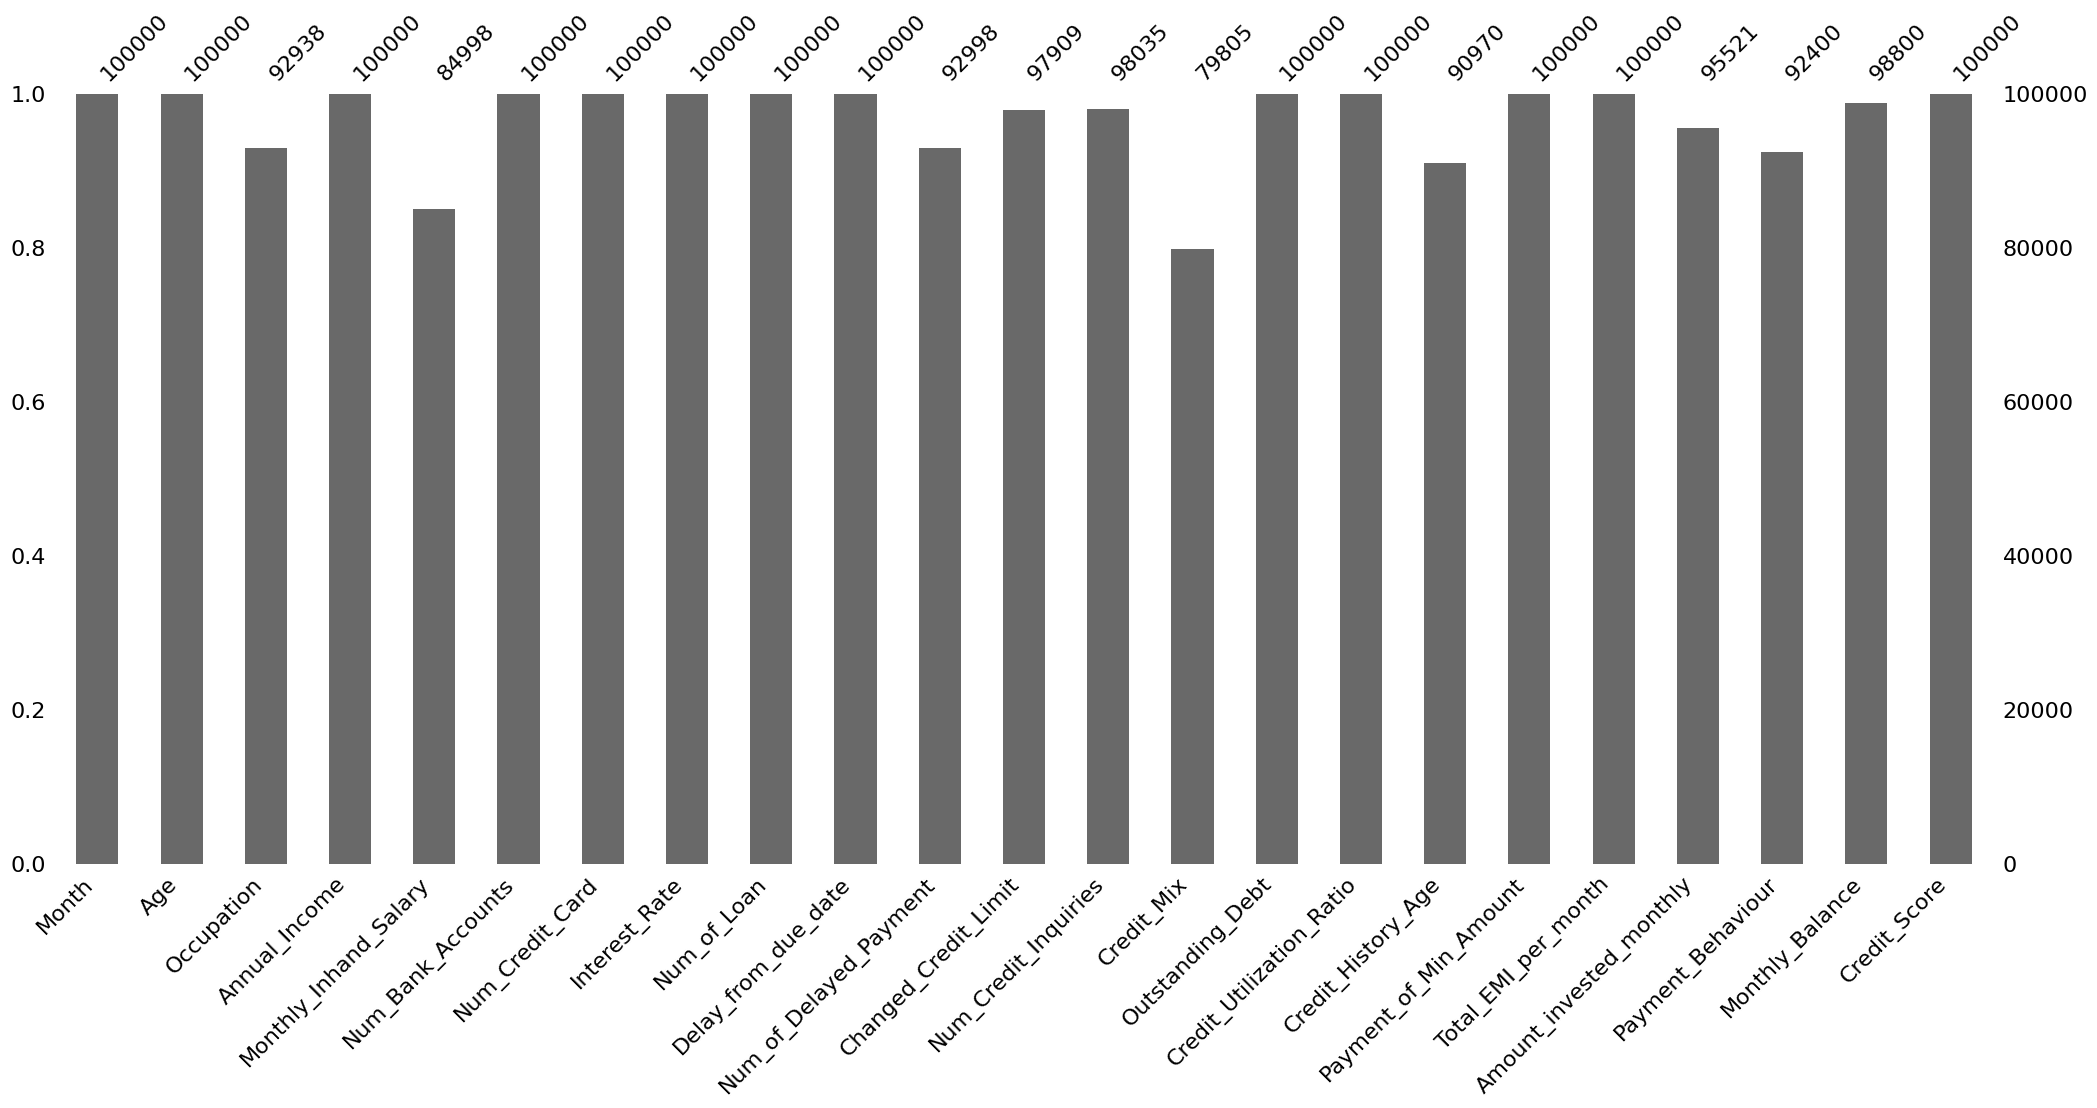

In [34]:
msno.bar(df)
plt.show()

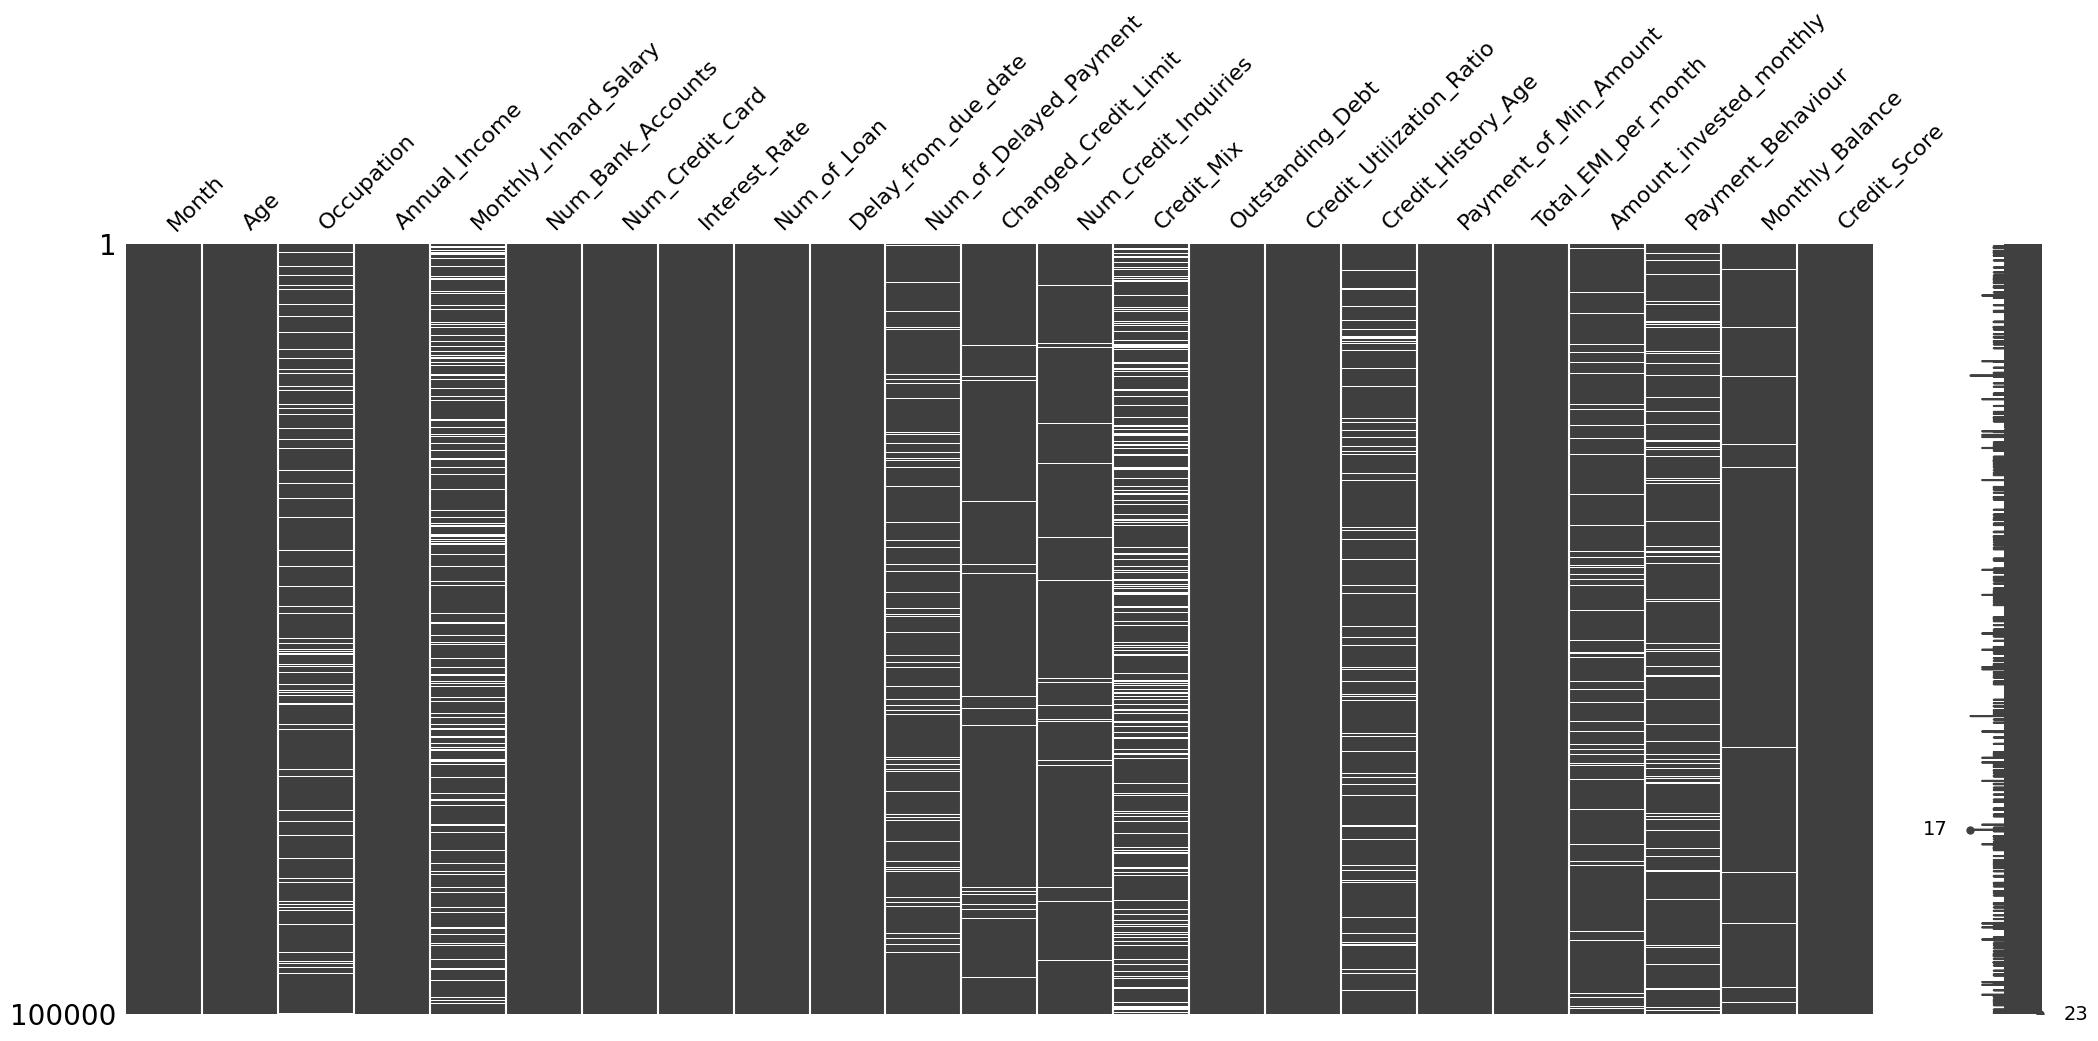

In [35]:
msno.matrix(df)
plt.show()

Using the missingno library here is the visual representation of the missing values.

In [36]:
features = df.drop('Credit_Score',axis=1)
label=df.Credit_Score

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_data:
    le.fit(features[i])
    print("The column {} and the order of encoding is {}".format(i,le.classes_))
    features[i]=le.fit_transform(features[i])

The column Month and the order of encoding is ['April' 'August' 'February' 'January' 'July' 'June' 'March' 'May']
The column Occupation and the order of encoding is ['Accountant' 'Architect' 'Developer' 'Doctor' 'Engineer' 'Entrepreneur'
 'Journalist' 'Lawyer' 'Manager' 'Mechanic' 'Media_Manager' 'Musician'
 'Scientist' 'Teacher' 'Writer' nan]
The column Credit_Mix and the order of encoding is ['Bad' 'Good' 'Standard' nan]
The column Payment_of_Min_Amount and the order of encoding is ['NM' 'No' 'Yes']
The column Payment_Behaviour and the order of encoding is ['High_spent_Large_value_payments' 'High_spent_Medium_value_payments'
 'High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments' nan]


Label encoding before the imputation takes place.

In [38]:
features.Occupation=features.Occupation.map(lambda x:np.nan if x== 15 else x)
features.Credit_Mix=features.Credit_Mix.map(lambda x:np.nan if x== 3 else x)
features.Payment_Behaviour=features.Payment_Behaviour.map(lambda x:np.nan if x== 6 else x)

Changing the wrongly encoded values into null values.

In [39]:
from sklearn.impute import KNNImputer
knn=KNNImputer()
knn_features=features.copy(deep=True)
knn_features.iloc[:,:]=knn.fit_transform(knn_features.iloc[:,:])

Using the KNN imputation for changing the null values into valid values.

In [40]:
crd=pd.concat([knn_features,label],axis=1)

In [41]:
crd.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,3.500000,119.509700,6.950494,1.764157e+05,4193.012399,17.091700,22.47443,72.466040,10.761960,21.095040,...,27.737978,1.222654,1413.521289,32.284570,18.372403,1.403190,1402.687080,636.105444,2.750008,4.030000e+24
std,2.291299,684.757313,4.245857,1.429618e+06,3179.786742,117.404773,129.05741,466.422621,61.789933,14.822802,...,191.620771,0.780300,1156.434704,5.123916,8.216399,0.693378,8306.107873,2006.046987,1.809846,3.642946e+25
min,0.000000,14.000000,0.000000,7.006000e+03,303.650000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.230000,20.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.000000e-02
25%,1.750000,25.000000,3.000000,1.945800e+04,1626.590000,3.000000,4.00000,8.000000,2.000000,10.000000,...,3.000000,1.000000,551.800000,28.000000,12.100000,1.000000,30.000000,75.600000,1.000000,2.709100e+02
50%,3.500000,34.000000,7.000000,3.757900e+04,3097.020000,6.000000,5.00000,13.000000,3.000000,18.000000,...,6.000000,1.000000,1154.390000,32.000000,18.300000,2.000000,69.000000,137.270000,3.000000,3.386700e+02
75%,5.250000,42.000000,11.000000,7.279100e+04,5941.090000,7.000000,7.00000,20.000000,6.000000,28.000000,...,9.000000,2.000000,1933.430000,36.000000,25.000000,2.000000,161.000000,270.760000,5.000000,4.785825e+02
max,7.000000,8698.000000,14.000000,2.419806e+07,15204.630000,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,...,2597.000000,2.000000,4998.070000,50.000000,33.800000,2.000000,82331.000000,10000.000000,5.000000,3.333333e+26


In [42]:
le.fit(crd['Credit_Score'])
print("The column credit_score has these classes encoded in the order of {}".format(le.classes_))
crd['Credit_Score']=le.fit_transform(crd.Credit_Score)

The column credit_score has these classes encoded in the order of ['Good' 'Poor' 'Standard']


Changing the label into encoded values for machine learning.

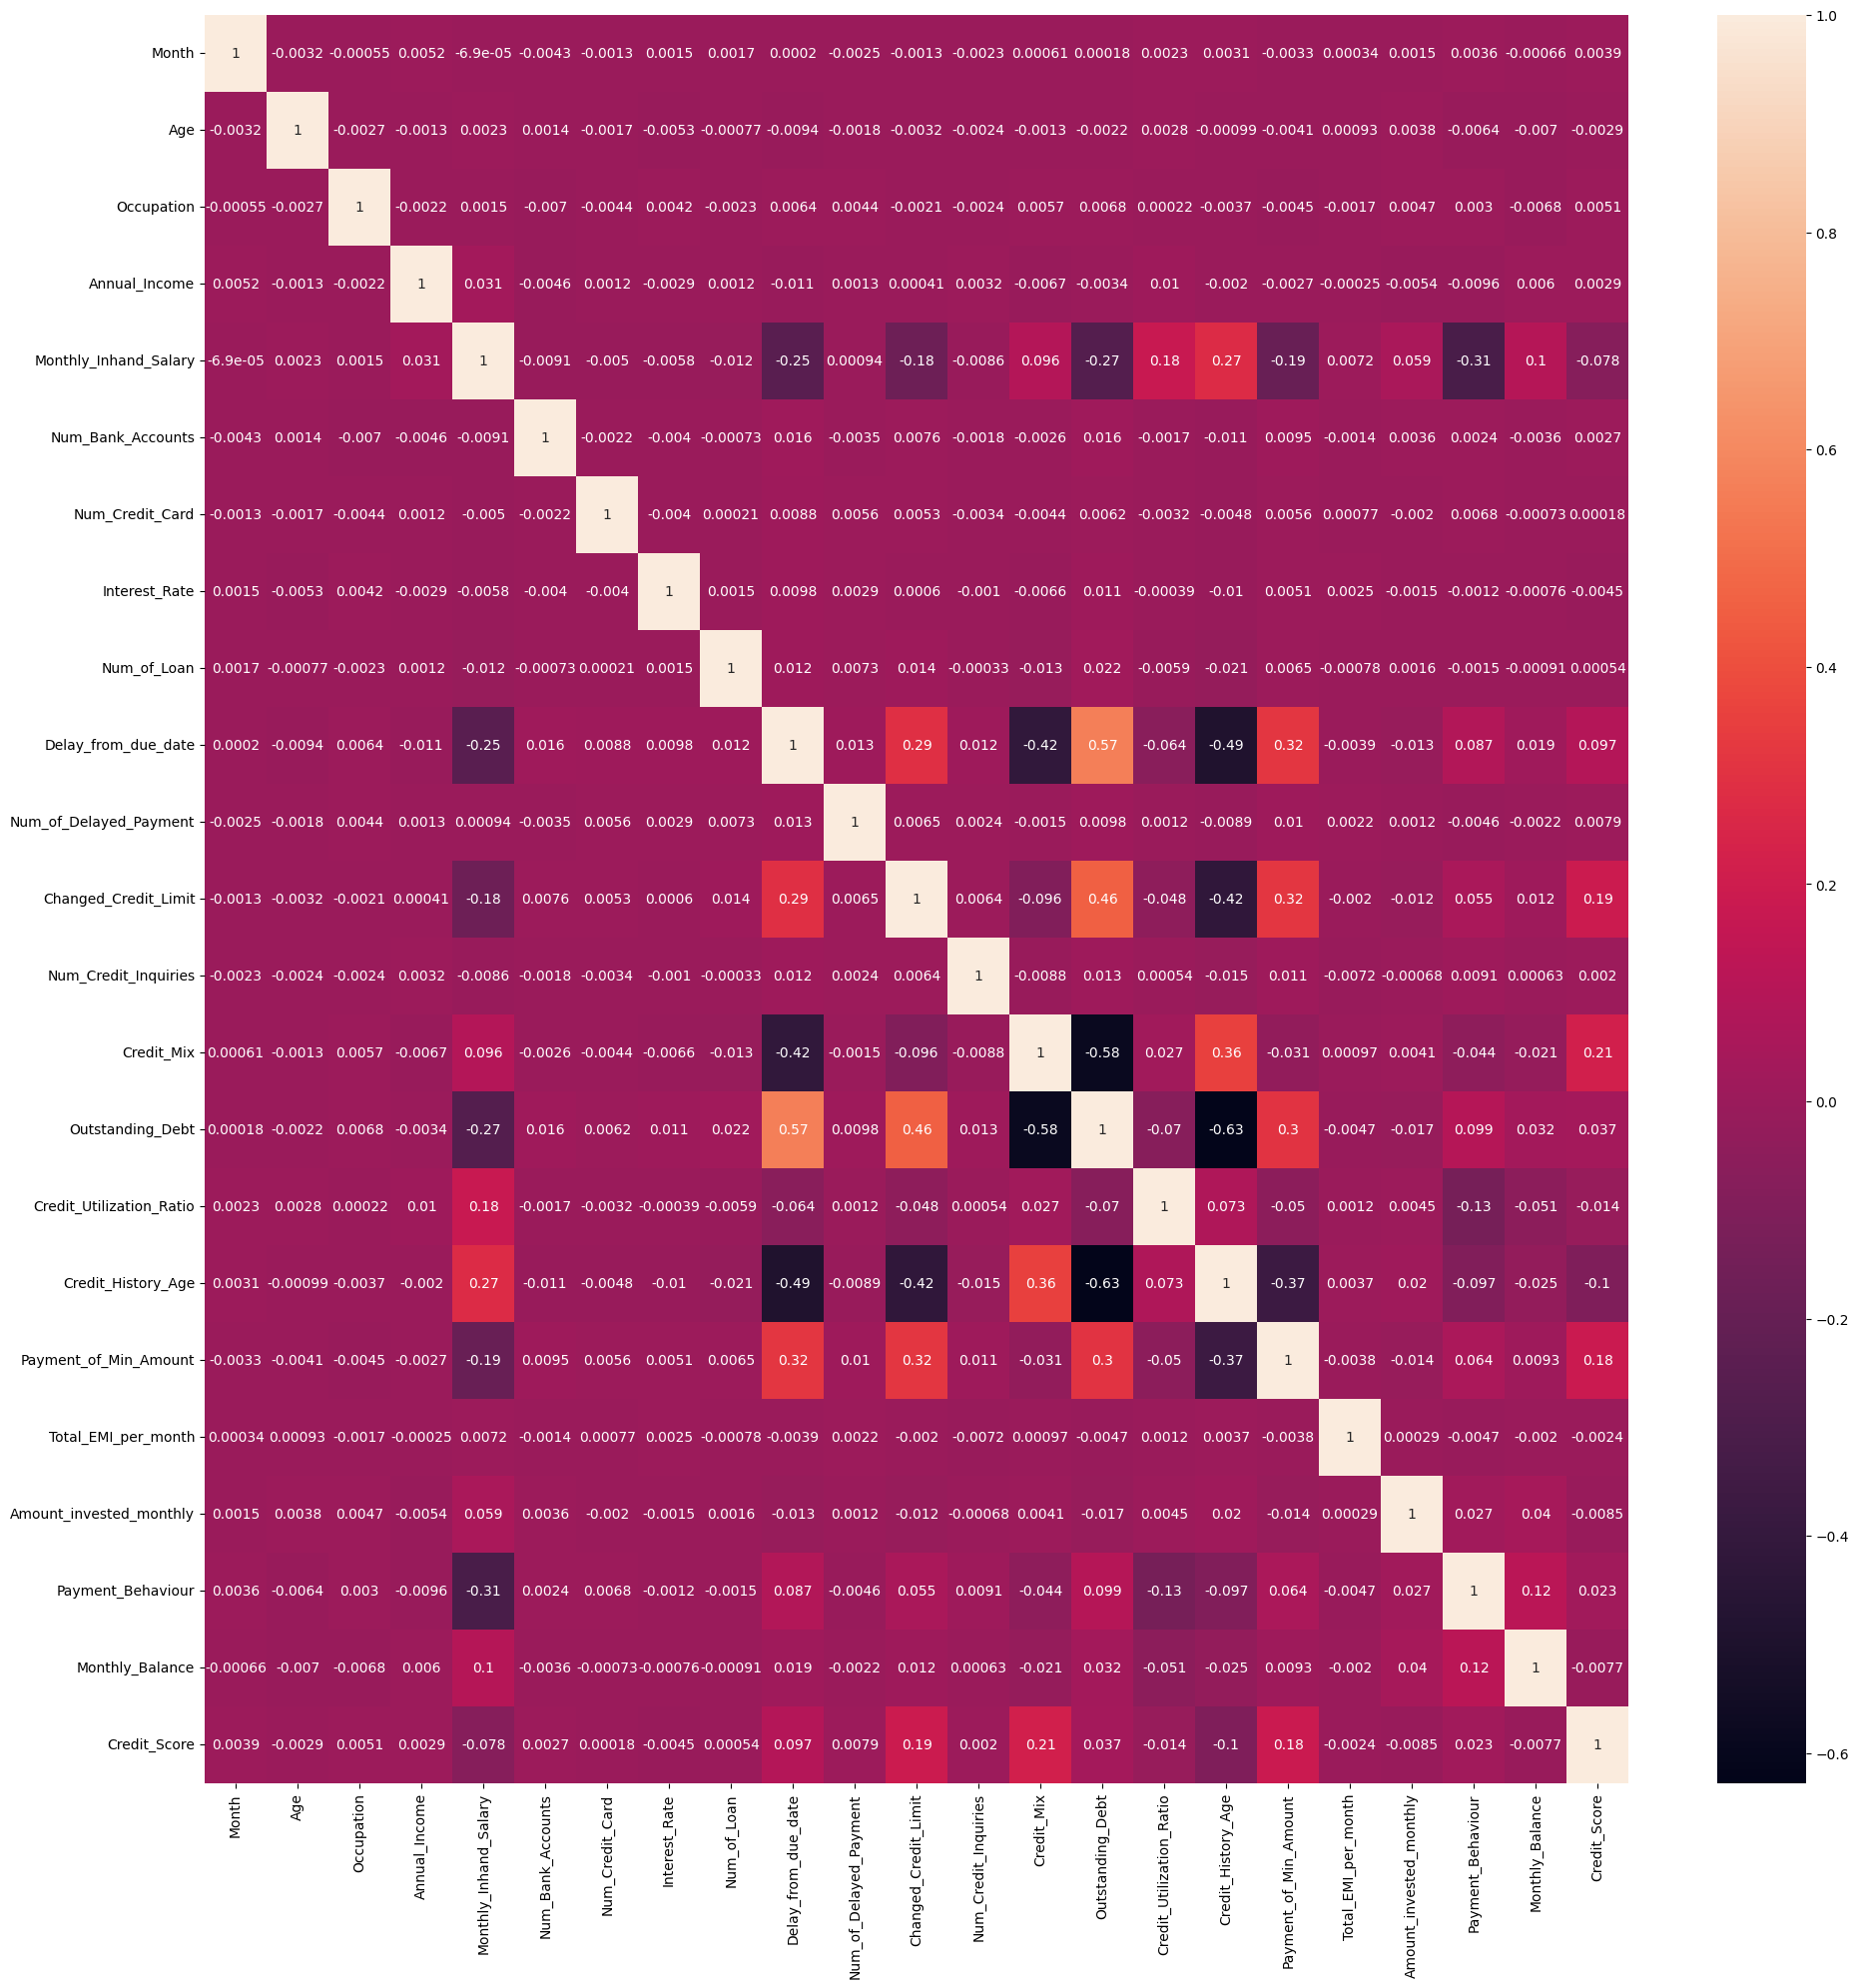

In [43]:
plt.figure(figsize=(23,23))
sns.heatmap(crd.corr(),annot=True)
plt.show()

Using correlation, checking the multi collinearity factor.

In [44]:
ml=crd.copy(deep=True)

In [45]:
tb1=ml.skew()
tb1

Month                        0.000000
Age                          9.236855
Occupation                   0.009648
Annual_Income               12.512173
Monthly_Inhand_Salary        1.130946
Num_Bank_Accounts           11.202489
Num_Credit_Card              8.458017
Interest_Rate                9.006015
Num_of_Loan                 16.606122
Delay_from_due_date          0.979211
Num_of_Delayed_Payment      14.584387
Changed_Credit_Limit         0.644351
Num_Credit_Inquiries         9.836519
Credit_Mix                  -0.455725
Outstanding_Debt             1.210209
Credit_Utilization_Ratio     0.028673
Credit_History_Age          -0.063868
Payment_of_Min_Amount       -0.731597
Total_EMI_per_month          7.102506
Amount_invested_monthly      4.372721
Payment_Behaviour           -0.118605
Monthly_Balance              8.929032
Credit_Score                -0.695176
dtype: float64

Checking the skewness of each column , because ML always requires the columns to be in noramlly distributed way for better results.

In [46]:
skewed2=[]
for i in tb1.index:
    if i == 'Credit_Score':
        continue
    else:
        if tb1[i]>0.5 or tb1[i]<-0.5:
            skewed2.append(i)
skewed2            

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [47]:
skewed3=['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']
from scipy.stats import yeojohnson
for i in skewed3:
    ml[i]=yeojohnson(ml[i])[0]

Using yeojhonson for converting the columns into normally distributed manner.

In [48]:
ml.skew()

Month                       0.000000
Age                        -0.086022
Occupation                  0.009648
Annual_Income              -0.058683
Monthly_Inhand_Salary      -0.018606
Num_Bank_Accounts          -0.361744
Num_Credit_Card            -0.445885
Interest_Rate              -0.239019
Num_of_Loan                -0.103795
Delay_from_due_date        -0.030701
Num_of_Delayed_Payment     -0.213618
Changed_Credit_Limit        0.644351
Num_Credit_Inquiries       -0.202811
Credit_Mix                 -0.455725
Outstanding_Debt           -0.050082
Credit_Utilization_Ratio    0.028673
Credit_History_Age         -0.063868
Payment_of_Min_Amount      -0.731597
Total_EMI_per_month        -0.026574
Amount_invested_monthly    -0.237095
Payment_Behaviour          -0.118605
Monthly_Balance            -0.827356
Credit_Score               -0.695176
dtype: float64

Apart from the columns which are highly correlated with the labels , all the other columns are converted into normally distributed manner.

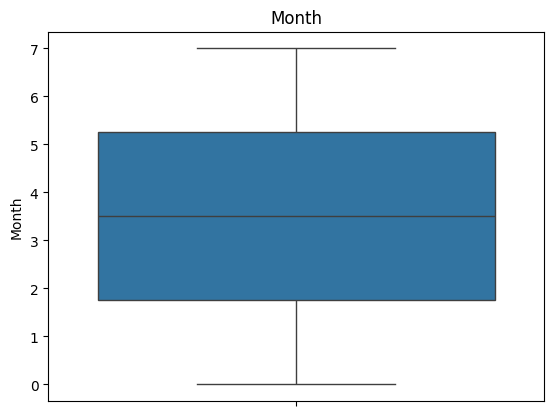

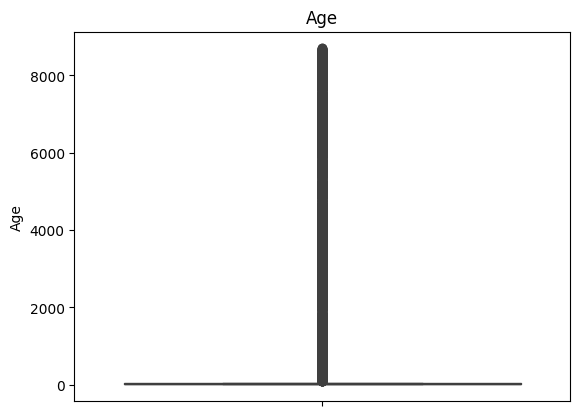

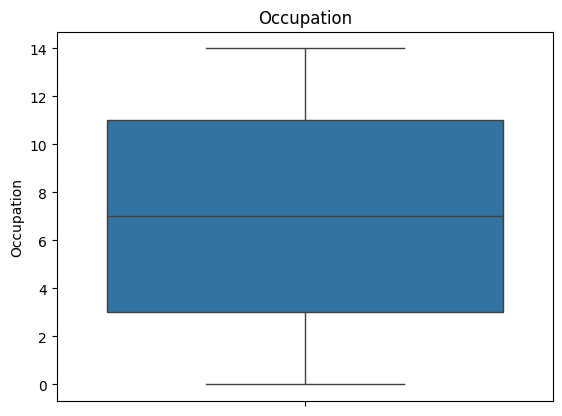

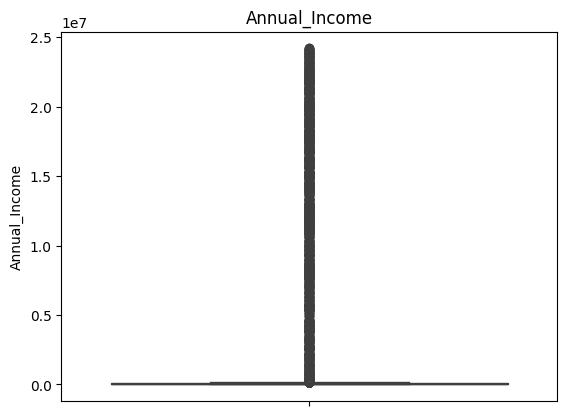

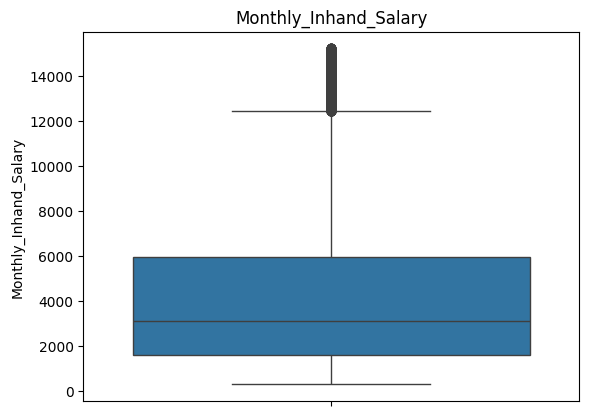

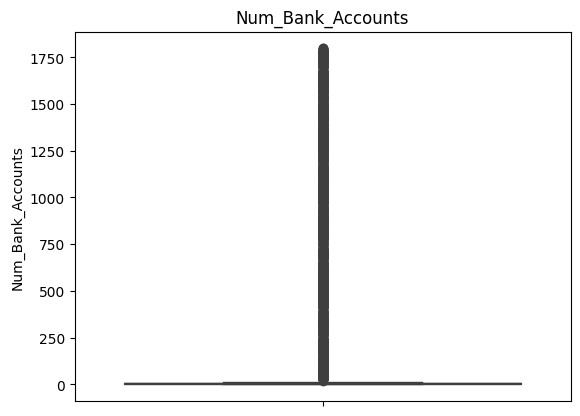

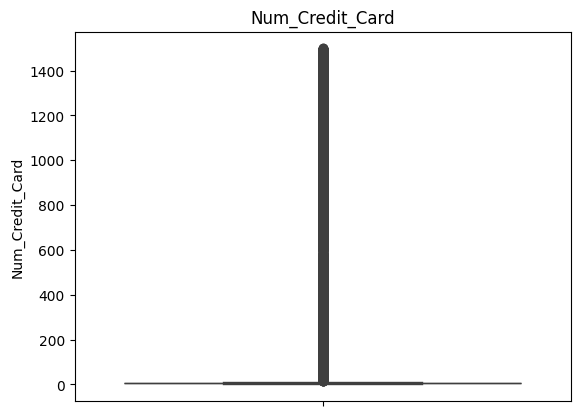

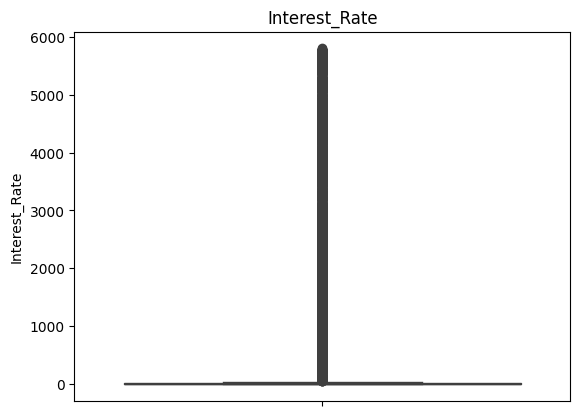

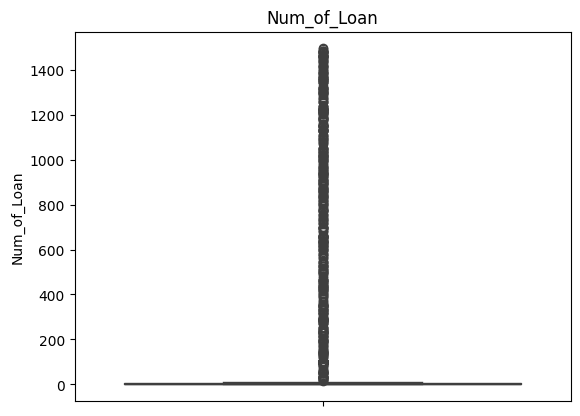

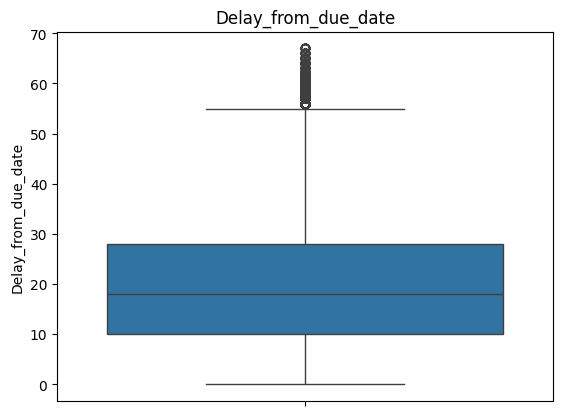

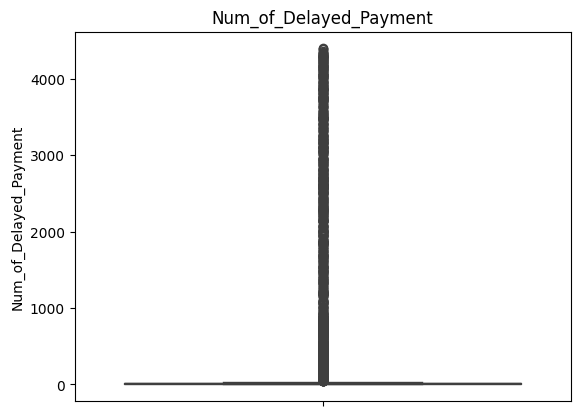

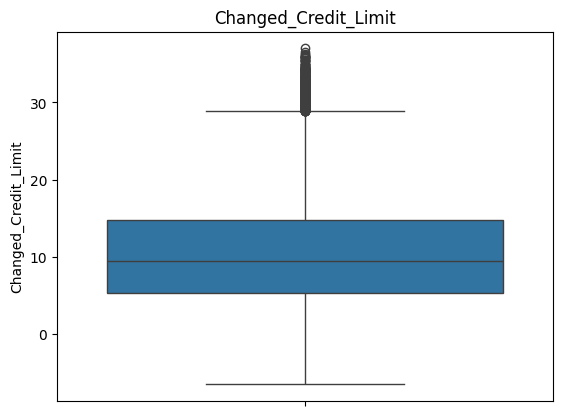

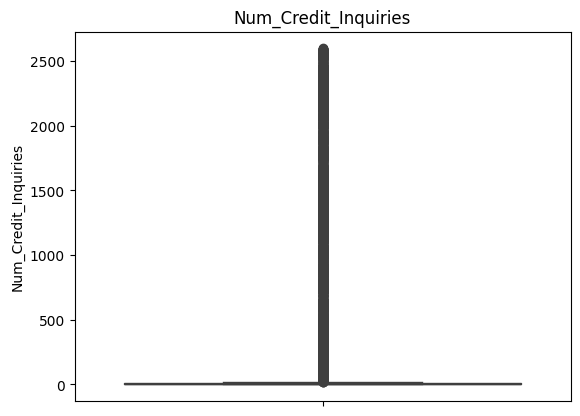

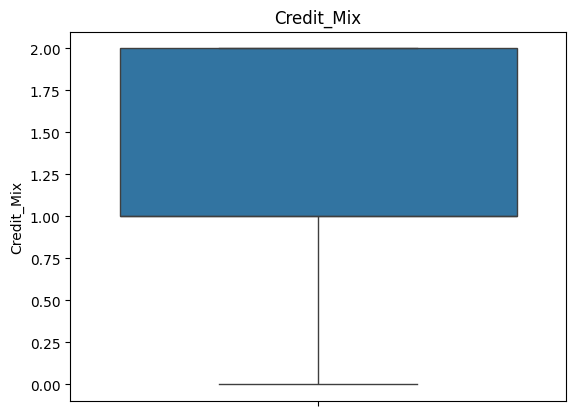

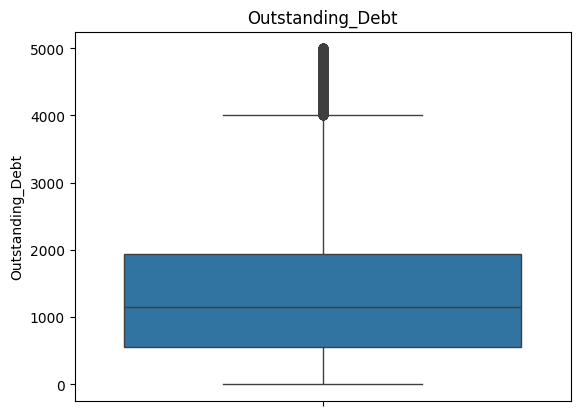

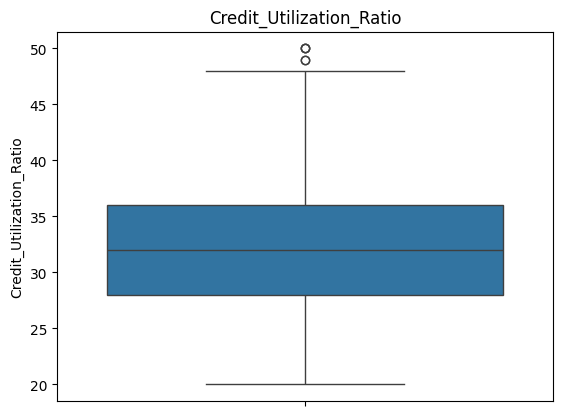

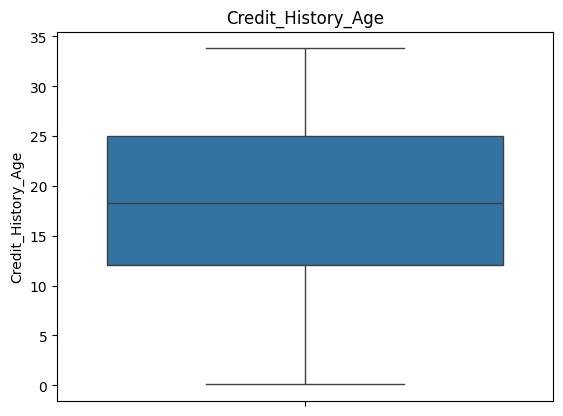

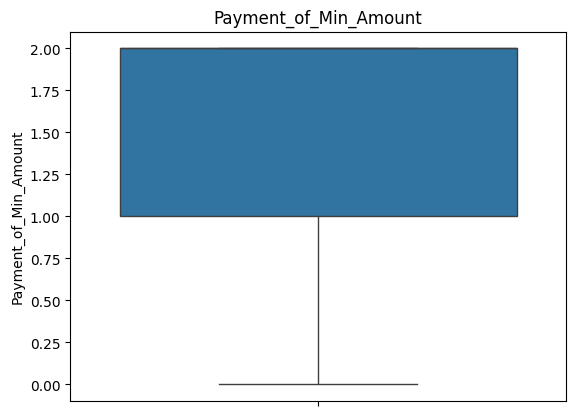

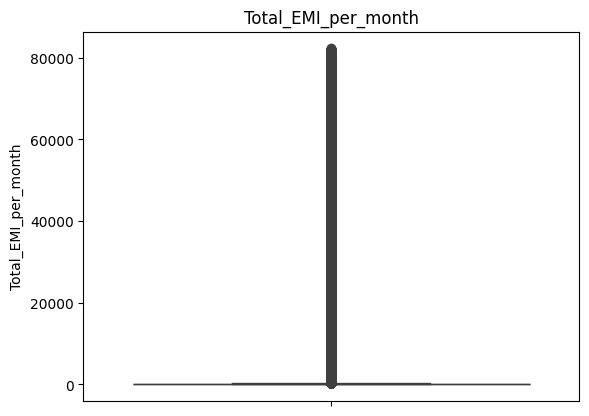

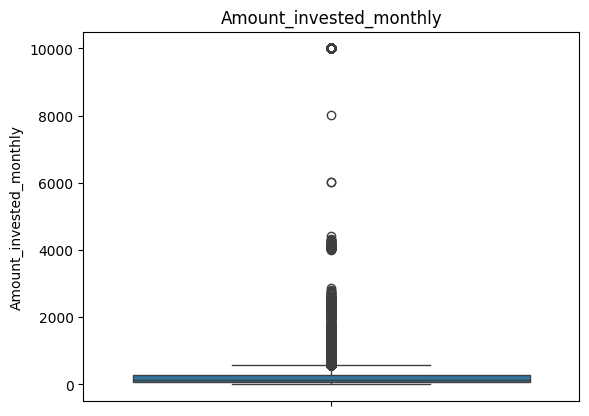

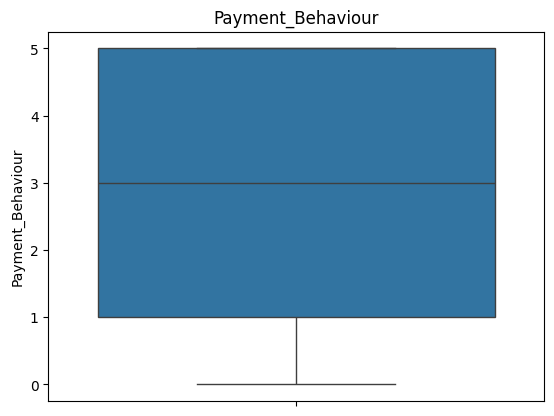

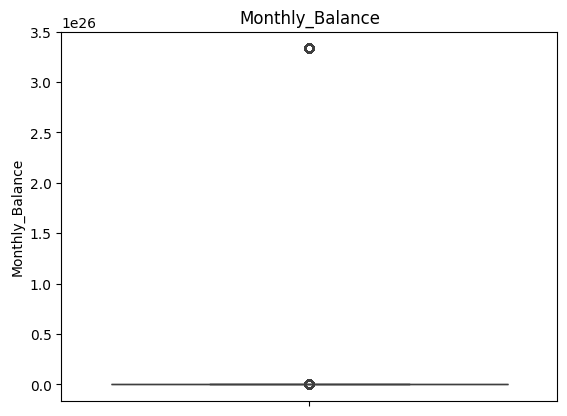

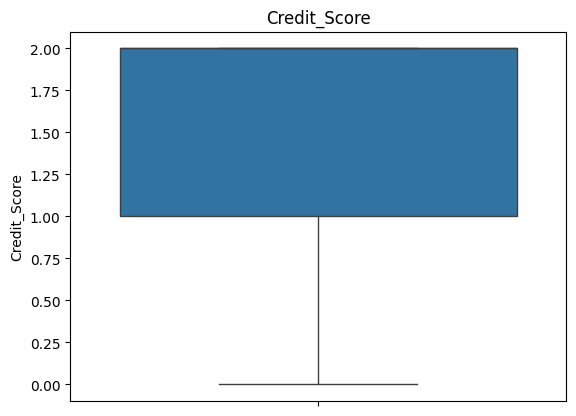

In [45]:
for i in ml.columns:
    sns.boxplot(ml[i])
    plt.title(i)
    plt.show()
    

In [46]:
outliers=['Age','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries']

for i in outliers:
    q1=ml[i].quantile(0.25)
    q3=ml[i].quantile(0.75)
    
    iqr=q3-q1
    
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    
    ml[i]=ml[i].clip(lower=lower_limit,upper=upper_limit)

Checking for the outliers, and using the Inter Quartile Range to replace the outliers which makes mess with ML model.

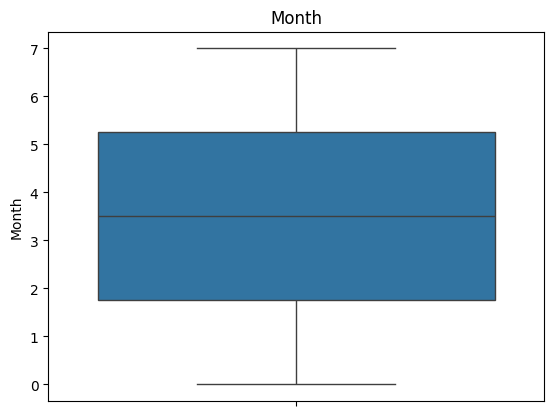

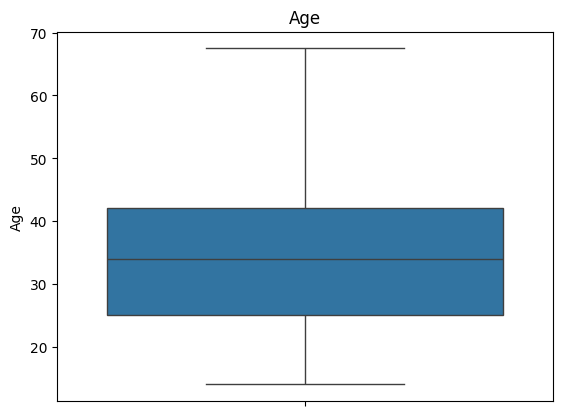

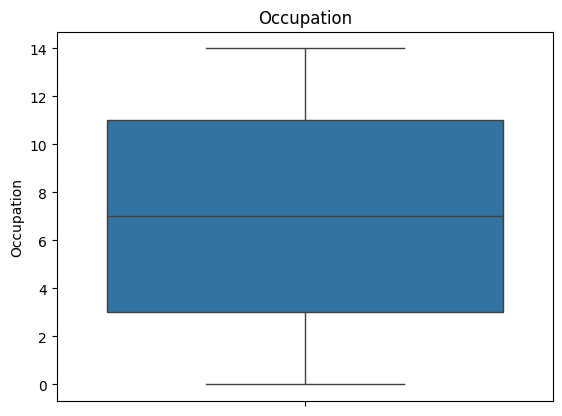

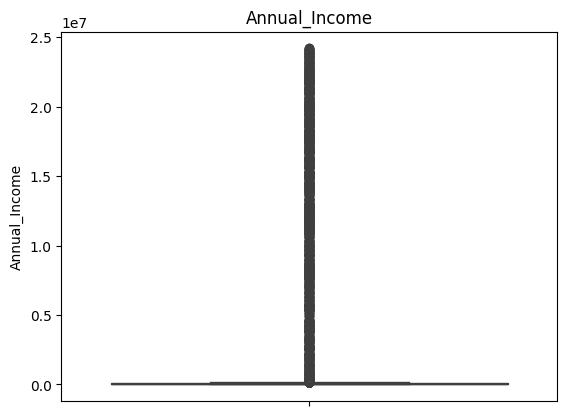

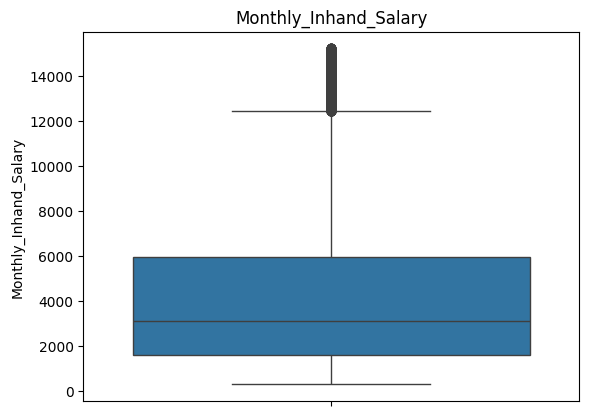

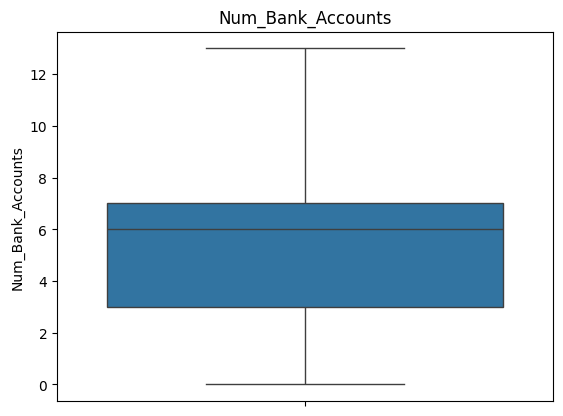

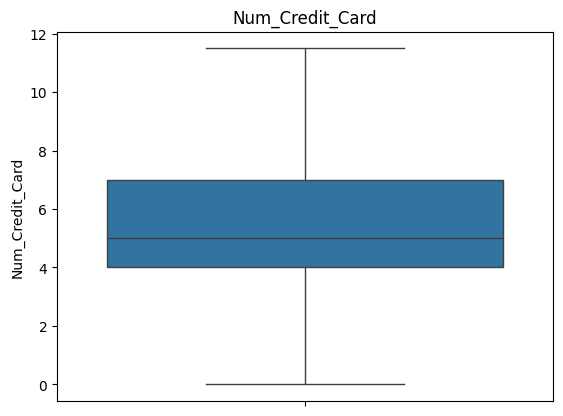

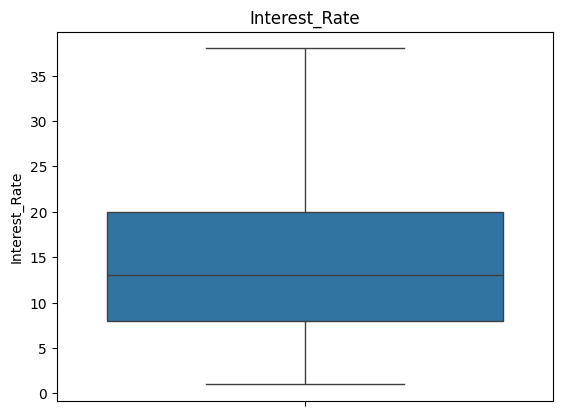

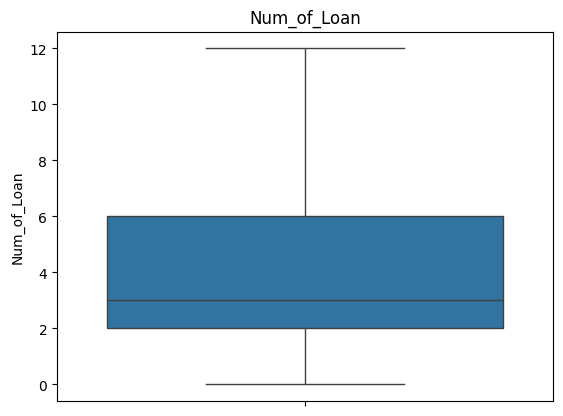

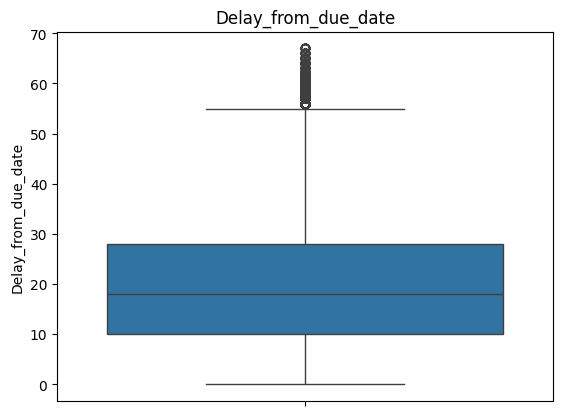

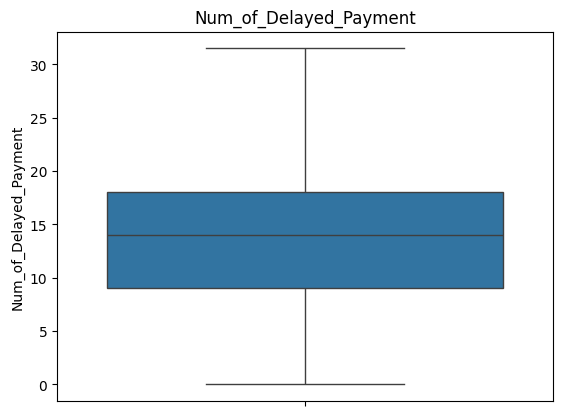

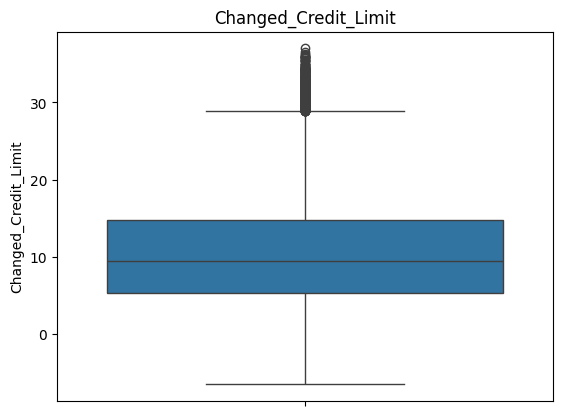

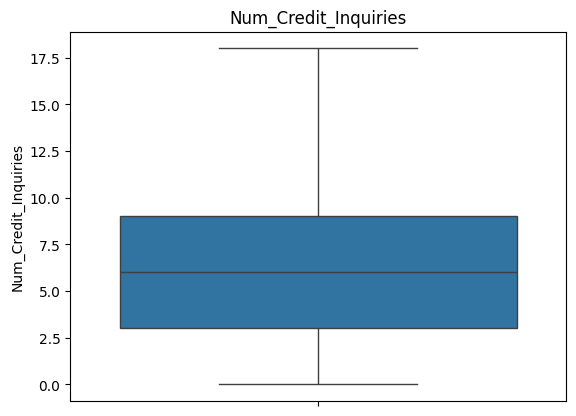

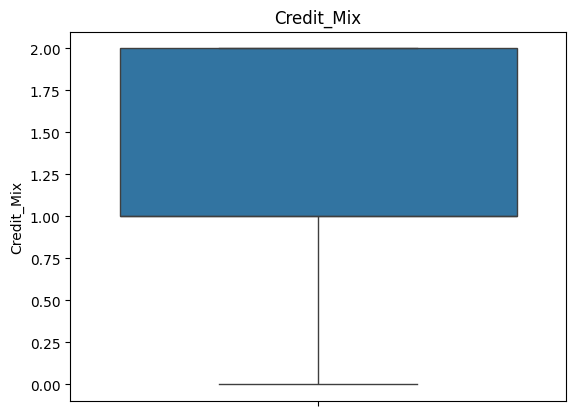

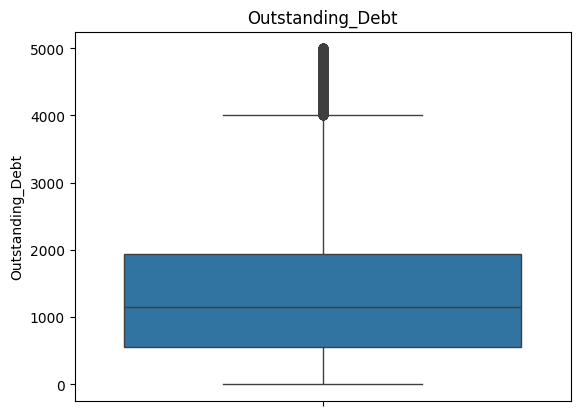

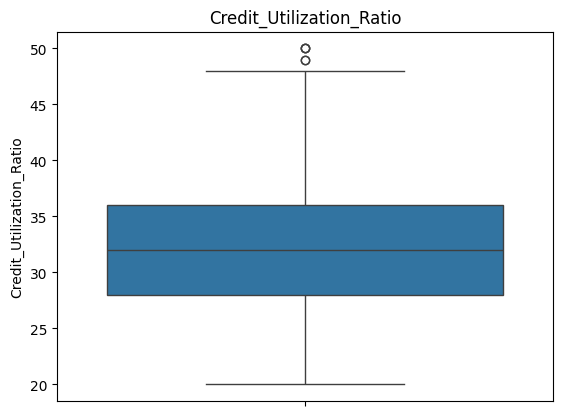

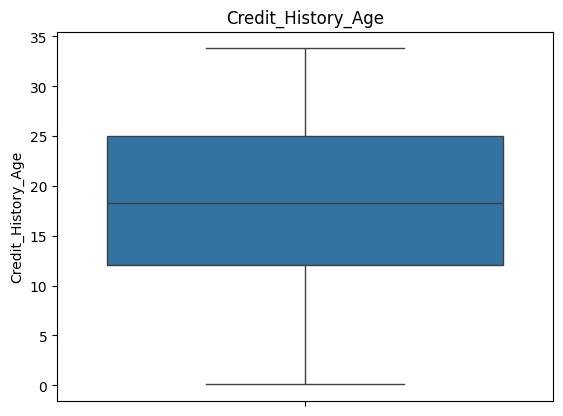

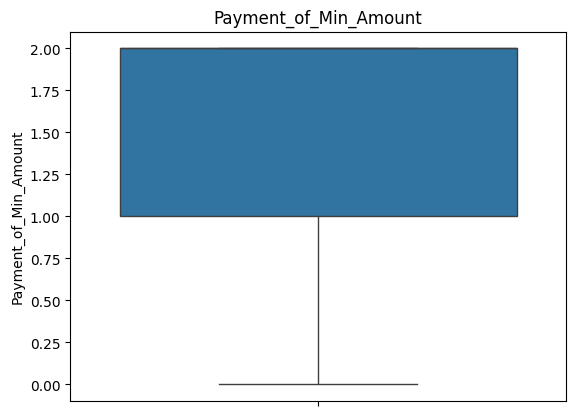

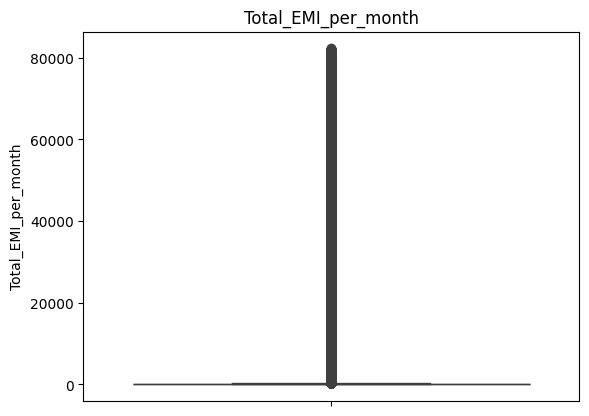

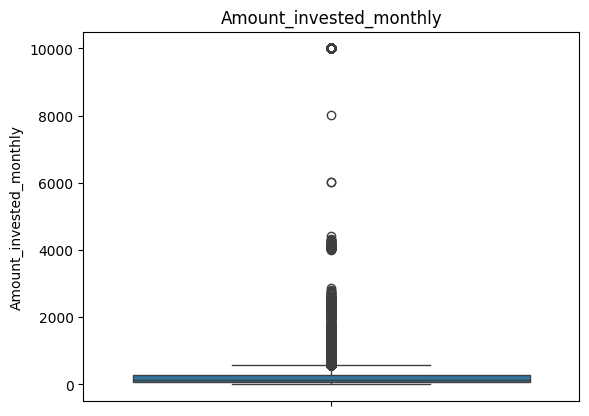

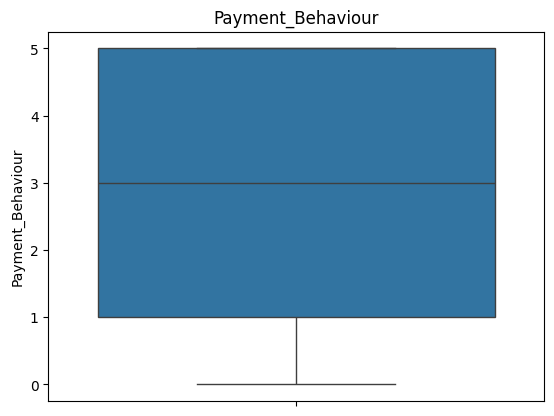

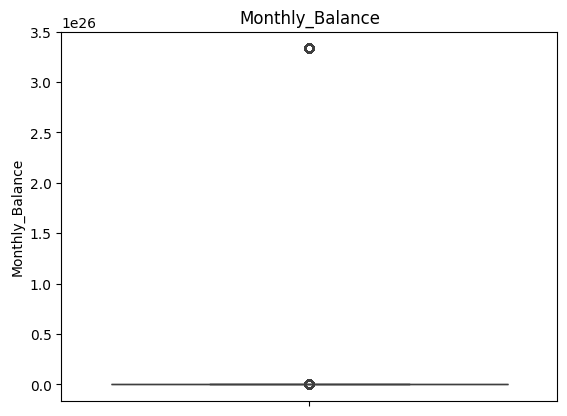

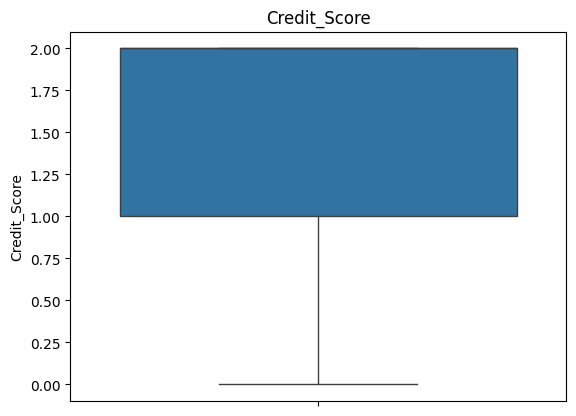

In [47]:
for i in ml.columns:
    sns.boxplot(ml[i])
    plt.title(i)
    plt.show()

In [48]:
ml.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,3.500000,34.270555,6.950494,1.764157e+05,4193.012399,5.46841,5.668825,15.008950,3.901870,21.095040,...,1.222654,1413.521289,32.284570,18.372403,1.403190,1402.687080,636.105444,2.750008,4.030000e+24,1.353460
std,2.291299,12.014335,4.245857,1.429618e+06,3179.786742,2.71862,2.229002,9.263065,2.951262,14.822802,...,0.780300,1156.434704,5.123916,8.216399,0.693378,8306.107873,2006.046987,1.809846,3.642946e+25,0.764913
min,0.000000,14.000000,0.000000,7.006000e+03,303.650000,0.00000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.230000,20.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.000000e-02,0.000000
25%,1.750000,25.000000,3.000000,1.945800e+04,1626.590000,3.00000,4.000000,8.000000,2.000000,10.000000,...,1.000000,551.800000,28.000000,12.100000,1.000000,30.000000,75.600000,1.000000,2.709100e+02,1.000000
50%,3.500000,34.000000,7.000000,3.757900e+04,3097.020000,6.00000,5.000000,13.000000,3.000000,18.000000,...,1.000000,1154.390000,32.000000,18.300000,2.000000,69.000000,137.270000,3.000000,3.386700e+02,2.000000
75%,5.250000,42.000000,11.000000,7.279100e+04,5941.090000,7.00000,7.000000,20.000000,6.000000,28.000000,...,2.000000,1933.430000,36.000000,25.000000,2.000000,161.000000,270.760000,5.000000,4.785825e+02,2.000000
max,7.000000,67.500000,14.000000,2.419806e+07,15204.630000,13.00000,11.500000,38.000000,12.000000,67.000000,...,2.000000,4998.070000,50.000000,33.800000,2.000000,82331.000000,10000.000000,5.000000,3.333333e+26,2.000000


In [49]:
ml.Credit_Score.value_counts()

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

We can see that the data is imbalanced so we have to make it balanced inorder to get the better results.

In [50]:
ml1=ml[ml['Credit_Score']==0].sample(n=15000,random_state=12)
ml2=ml[ml['Credit_Score']==1].sample(n=15000,random_state=12)
ml3=ml[ml['Credit_Score']==2].sample(n=15000,random_state=12)
ml4=pd.concat([ml1,ml2],axis=0).sample(frac=1,random_state=14)
ml4

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3517,5,20.0,12.0,78139.0,6315.62,3,5.0,1,0.0,14,...,1.0,1116.88,25.0,31.10,0,0,118.67,0.0,752.89,0
6087,1,49.0,6.0,97516.0,8066.32,5,11.5,16,0.0,6,...,2.0,154.94,31.0,29.28,2,0,141.98,0.0,904.65,1
97451,0,36.0,13.0,25573.0,1948.09,8,6.0,11,4.0,8,...,1.0,477.20,34.0,17.70,1,52,81.67,4.0,340.89,0
69977,2,31.0,1.0,29986.0,2655.87,10,7.0,18,7.0,49,...,0.0,3836.36,34.0,0.11,2,120,46.86,1.0,347.97,1
65488,3,55.0,10.0,60920.0,5373.65,0,6.0,7,3.0,6,...,1.4,1338.17,29.0,19.70,1,145,257.15,5.0,424.38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82519,1,41.0,11.0,146772.0,12197.98,5,4.0,19,2.0,5,...,2.0,48.79,39.0,29.10,1,194,420.99,1.0,853.85,1
46947,0,22.0,14.0,60401.0,5163.45,6,6.0,27,6.0,46,...,0.0,2253.93,37.0,19.00,2,226,373.06,4.4,206.39,1
73430,4,35.0,2.0,59126.0,4933.15,0,6.0,2,1.0,5,...,1.0,53.90,26.0,28.50,0,33,180.07,3.0,549.92,0
65903,1,38.0,9.0,105741.0,8706.75,3,6.0,5,3.0,12,...,1.4,303.68,27.0,22.10,1,145,407.66,3.0,587.43,0


Selecting the important data points and making the dataframe balanced for better results.

In [51]:
x=ml4.drop('Credit_Score',axis=1)
y=ml4['Credit_Score']

## DATA TRANSFORMATION:

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

Splitting the data into test train inorder to train the model.

In [53]:
from sklearn.feature_selection import mutual_info_classif
fp=mutual_info_classif(x_train,y_train)
fp=pd.Series(fp,index=x.columns)
fp.sort_values(ascending=False)

Outstanding_Debt            0.496677
Annual_Income               0.439532
Monthly_Inhand_Salary       0.359771
Interest_Rate               0.291539
Credit_Mix                  0.261169
Delay_from_due_date         0.235153
Payment_of_Min_Amount       0.233721
Num_Credit_Inquiries        0.231349
Credit_History_Age          0.223248
Num_Bank_Accounts           0.193070
Num_Credit_Card             0.192965
Num_of_Loan                 0.182984
Num_of_Delayed_Payment      0.169517
Changed_Credit_Limit        0.127059
Total_EMI_per_month         0.060512
Age                         0.055494
Amount_invested_monthly     0.020610
Payment_Behaviour           0.017102
Credit_Utilization_Ratio    0.003194
Monthly_Balance             0.002098
Occupation                  0.000000
Month                       0.000000
dtype: float64

Mutual Information Classification (Mutual Info Classif) is a feature selection technique in machine learning that measures the information shared between each feature and the target class label. It assigns scores to features, helping select the most informative ones for classification tasks, improving model efficiency and performance.

In [54]:
from sklearn.feature_selection import SelectKBest
sk=SelectKBest(mutual_info_classif,k=5)
sk.fit(x_train,y_train)
imp=x_train.columns[sk.get_support()]

SelectKBest is a feature selection method in machine learning that selects the top K (a user-defined number) most informative features based on a scoring function. It's often used in conjunction with mutual information or other scoring methods to choose the best features for a model, reducing dimensionality and improving performance.

In [55]:
for i in x_train.columns:
    if i in imp:
        continue
    else:
        x_train=x_train.drop(i,axis=1)
        x_test=x_test.drop(i,axis=1)

In [56]:
x_train

,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Credit_Mix,Outstanding_Debt
72722,19596.0,1687.000,16,0.0,1287.97
72349,44599.0,3757.920,4,1.0,694.02
30023,28024.0,2023.240,18,2.0,428.84
65905,172952.0,5226.168,8,1.0,330.47
28298,26509.0,2500.050,12,1.0,1356.64
...,...,...,...,...,...
67124,46256.0,4048.700,30,0.0,4336.75
24987,16472.0,1563.670,6,1.2,727.41
14223,42237.0,3725.780,4,1.0,1170.65
84283,18812.0,1782.630,8,1.0,19.96


In [57]:
from sklearn.preprocessing import StandardScaler
mn=StandardScaler()
x_train=mn.fit_transform(x_train)
x_test=mn.transform(x_test)

Scaling the data points using standard scaler because the ML model produces better result in the scaled datapoints.

## MODEL EVALUATION:

In [58]:
ann=keras.Sequential()
ann.add(keras.layers.Dense(100,input_shape=(5,),activation='relu',kernel_initializer='he_uniform'))
ann.add(keras.layers.Dense(800,activation='relu'))
ann.add(keras.layers.BatchNormalization())
ann.add(keras.layers.Dense(700,activation='relu'))
ann.add(keras.layers.Dense(600,activation='relu'))
ann.add(keras.layers.Dropout(0.1))
ann.add(keras.layers.Dense(1,activation='sigmoid'))

With the help of keras building an artificial nueral network using relu and sigmoid activation.

In [59]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
history=ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
750/750 [==============================] - 5s 4ms/step - loss: 0.3968 - accuracy: 0.8508
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3719 - accuracy: 0.8573
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3669 - accuracy: 0.8603
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3653 - accuracy: 0.8607
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3629 - accuracy: 0.8605


In [61]:
ann.evaluate(x_test,y_test)

188/188 [==============================] - 1s 4ms/step - loss: 0.3634 - accuracy: 0.8570


[0.36336222290992737, 0.8569999933242798]

## METRICS:

In [62]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [63]:
loss=history.history['loss']

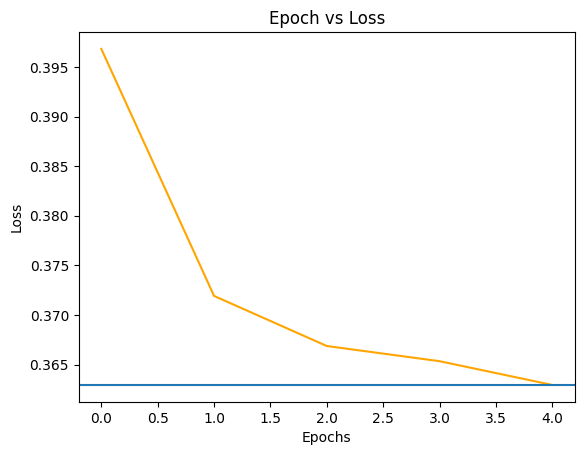

In [64]:
plt.title("Epoch vs Loss")
plt.plot(range(5),loss,color='orange')
plt.axhline(np.min(loss))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

We can see that the loss decreases eith increase in epochs.

In [65]:
y_pred=ann.predict(x_test)

188/188 [==============================] - 1s 2ms/step


In [66]:
ans=[]
for i in y_pred:
    x=np.round(i)
    ans.append(x)

In [67]:
from sklearn.metrics import classification_report,roc_auc_score,auc,roc_curve
print(classification_report(y_test,ans))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      3021
           1       0.96      0.75      0.84      2979

    accuracy                           0.86      6000
   macro avg       0.88      0.86      0.86      6000
weighted avg       0.87      0.86      0.86      6000



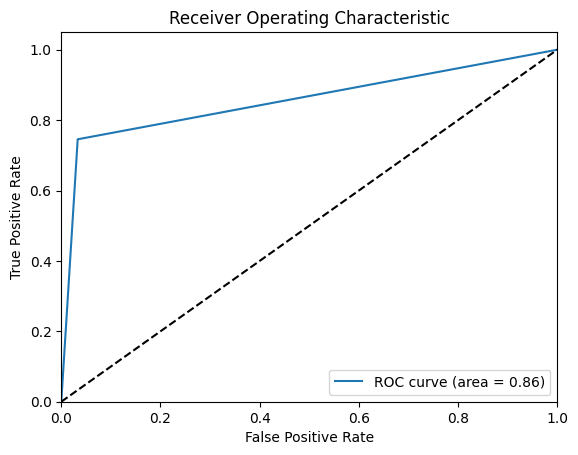

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, ans)
# Calculate AUC using scikit-learn
auc_score = auc(fpr, tpr)

# Plot ROC curve using Matplotlib
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

We can see that there is high precision and recall with the accuracy and roc of 86 %.

## MODEL SAVING

In [69]:
ann.save('./1')

INFO:tensorflow:Assets written to: ./1\assets


In [70]:
from joblib import dump
dump(mn,'standardscaler.pkl')

['standardscaler.pkl']